In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("penguins_size.csv")
df=df.dropna(axis=0)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df["body_mass_kg"] = (df["body_mass_g"]/1000)
df["flipper_length_m"] = (df["flipper_length_mm"]/1000)

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg,flipper_length_m
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.75,0.181
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.80,0.186
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.25,0.195
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3.45,0.193
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3.65,0.190


Text(0, 0.5, 'Body Mass (kg)')

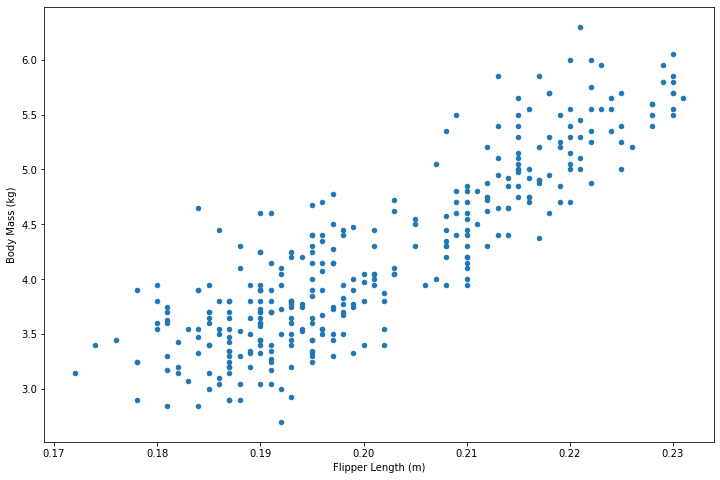

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df["flipper_length_m"],df["body_mass_kg"],s=20)
plt.xlabel('Flipper Length (m)')
plt.ylabel('Body Mass (kg)')

In [31]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [79]:
X = df["flipper_length_m"]
Y = df["body_mass_kg"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = X_train.values.reshape(-1, 1)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [81]:
Y_pred = model.predict(X_test.values.reshape(-1, 1))

In [82]:
Y_pred

array([3.17937877, 3.68562052, 2.82500955, 5.10309743, 3.48312382,
       4.5462315 , 3.48312382, 3.88811722, 3.58437217, 5.30559413,
       3.98936557, 3.88811722, 3.43249965, 3.17937877, 3.63499635,
       3.38187547, 3.63499635, 4.84997655, 3.98936557, 3.68562052,
       3.48312382, 3.02750625, 4.7487282 , 4.79935238, 5.1537216 ,
       4.64747985, 5.3562183 , 5.00184908, 3.63499635, 3.63499635,
       3.88811722, 3.63499635, 3.63499635, 3.58437217, 5.558715  ,
       3.68562052, 3.7362447 , 4.03998975, 5.00184908, 3.38187547,
       3.78686887, 3.17937877, 5.65996335, 4.5462315 , 3.63499635,
       5.1537216 , 3.78686887, 5.05247325, 3.48312382, 3.23000295,
       3.88811722, 3.9387414 , 4.59685568, 3.48312382, 5.558715  ,
       3.38187547, 3.63499635, 3.28062712, 4.09061392, 5.40684248,
       3.63499635, 5.05247325, 3.63499635, 5.40684248, 3.98936557,
       3.78686887, 3.58437217, 3.7362447 , 3.78686887, 2.9262579 ,
       3.9387414 , 3.9387414 , 4.24248645, 4.19186227, 4.49560

In [83]:
Y_test

172    3.600
84     3.350
20     3.400
227    5.200
200    3.250
       ...  
179    3.800
256    4.950
167    4.050
51     4.300
147    3.475
Name: body_mass_kg, Length: 101, dtype: float64

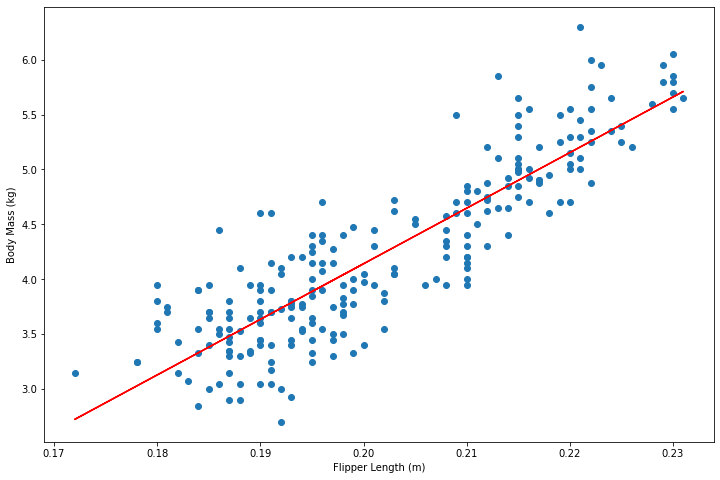

In [84]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color = "red")
plt.xlabel('Flipper Length (m)')
plt.ylabel('Body Mass (kg)')
plt.show()

In [85]:
k=5
folds = KFold(k, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
scores  

array([0.80632869, 0.80074399, 0.78398653, 0.67851786, 0.65619359])

In [86]:
avg_score = sum(scores)/k
avg_score

0.74515413125708